<a href="https://colab.research.google.com/github/santiago-vas/santiago-vas/blob/main/Rappi_Store_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1> Data Analyst Challenge 2022
<center><h1> Rappi -  Rappi favor 
</center></h1></center></h1>

---

DAVID SANTIAGO VASQUEZ NARANJO

---
En el siguiente codigo se lleva a cabo el analisis exploratorio de los siguientes datos:
1. challenge_analytics
2. Challenge_orders.

Asi como su limpieza o "data wrangling" para la correcta manipulacion de los datos y llegar a crear etricas y variables relevantes en el proceso de analisis.

El codigo tambien muestra el planteamiento de modelos de cluesterizacion y el analisis estadistico para determinar las variables apropiadas en el ejercicio.

---
Bogota Octubre 2022

</center>

--- 
# 0. Configuracion del entorno 

La configuracion del entorno consiste en la importacion de librerias a usar asi como tambien rutas generales para lectura o guardado de archivos, funciones de limpieza tanto de filas como columnas, graficas de completitud, graficas generales.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#@markdown Librerias  basicas
import numpy as np
from os import path
import pandas as pd
from datetime import timedelta
import math

import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.font_manager
from matplotlib import style
from math import nan,  inf
from datetime import date, datetime
from string import digits

import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

from mpl_toolkits.mplot3d import Axes3D

# import sys
# !{sys.executable} -m pip install pandas-profiling

# import pandas_profiling
# # from pandas_profiling.utils.cache import cache_file

In [3]:
#@markdown Definicion ruta principal para lectura y guardado de informacion

ruta_princ = '/content/drive/MyDrive/pruebas rappi/'


In [4]:
#@markdown * Funciones limpieza Data
#-------------------------------------------------------------------------------
def eliminar_columnas_vacias(dataframe,porcentaje):
  tasa_de_vacio = round(dataframe.isnull().mean()*100,3)
  columnas_vacias = (tasa_de_vacio>porcentaje)
  dataframe =  dataframe [columnas_vacias[~columnas_vacias].index]
  return dataframe

#-------------------------------------------------------------------------------
def eliminar_filas_incompletas(dataframe,porcentaje):
  completitud = dataframe.apply(lambda x: (((x.count()/dataframe.shape[1])*100)>porcentaje), axis=1)
  dataframe =  dataframe [completitud]
  return dataframe

#-------------------------------------------------------------------------------
def limpiar_archivo(dataset,porcentaje_columnas,porcentaje_filas):
  print('Antes de la limpieza : ', dataset.shape )
  dataset = eliminar_columnas_vacias(dataset,porcentaje_columnas) # parametros ( dataframe , porcentaje de vacio)
  # dataset = eliminar_filas_incompletas(dataset,porcentaje_filas) # parametros ( dataframe , porcentaje de vacio)

  print('Despues de la limpieza : ', dataset.shape )
  return dataset
#-------------------------------------------------------------------------------
def limpiar_archivo2(dataset,porcentaje_columnas,porcentaje_filas):
  print('Antes de la limpieza : ', dataset.shape )
  graficar_cantidad_nulos(dataset)

  dataset = eliminar_columnas_vacias(dataset,porcentaje_columnas) # parametros ( dataframe , porcentaje de vacio)
  # dataset = eliminar_filas_incompletas(dataset,porcentaje_filas) # parametros ( dataframe , porcentaje de vacio)

  print('Despues de la limpieza : ', dataset.shape )
  graficar_cantidad_nulos(dataset)
  return dataset
#-------------------------------------------------------------------------------
def limpiar_vacios_dataset(dataset,porcentaje_columnas,porcentaje_filas):
  print('Antes de la limpieza : ', dataset.shape )
  graficar_cantidad_nulos(dataset)

  dataset = eliminar_columnas_vacias(dataset,porcentaje_columnas) # parametros ( dataframe , porcentaje de vacio)
  dataset = eliminar_filas_incompletas(dataset,porcentaje_filas) # parametros ( dataframe , porcentaje de vacio)

  print('Despues de la limpieza : ', dataset.shape )
  graficar_cantidad_nulos(dataset)
  return dataset

#-------------------------
# @markdown * Funcion para limpieza y estandarizacion de caracteres, en variables categoricas
spec_char = '[!"$%\'()*+,_./:;<=>?[\\]^_`{|}~-]'
non_spec_char = lambda x: re.sub(spec_char,'', str(x))
a,b = 'ÁÉÍÓÚÜÑ¥áéíóú_-','AEIOUUNNaeiou  '
non_accent = lambda x: str(x).translate(str.maketrans(a,b))

nonums = '[!"#$%&\'\.\()-*@+,/:;<=>?[\\]^_`{|}~ABCDEFGHIJKLMNÑOPQRSTUVWXYZabcdefghijklmñnopqrstuvwxyzáéíóúÁÉÍÓÚÃÈÄäǞǟ´ÀÈÐÖ#&Ã±Ą̈ą̈B̈b̈C̈c̈ËëḦḧÏïḮḯJ̈j̈K̈k̈L̈l̈M̈m̈N̈n̈ÖöȪȫṎṏǪ̈ǫ̈P̈p̈Q̈q̈Q̣̈q̣̈S̈s̈T̈ẗÜüǗǘǛǜǙǚǕṺǖṻṲṳṲ̄ṳ̄ᴞV̈v̈ẄẅẌẍŸÿZ̈z̈ΪϊῒΐῗΫϋϔῢΰῧӒӓЁёӚӛӜӝӞӟӤӥЇїӦӧӪӫӰӱӴӵӸӹӬӭ]'
only_nums = lambda x: re.sub(nonums,'', str(x))

spaces = lambda x: str(x).strip()
none_spaces = lambda x: str(x).replace(' ', '')
double_spaces = lambda x: re.sub('\\s{2,}',' ', str(x))
mayusc = lambda x: str(x).upper()
minusc = lambda x: str(x).lower()


In [5]:
#@markdown Funcion de visualizacion de completitud de informacion

#-------------------------------------------------------------------------------
def graficar_cantidad_nulos(dataframe):
  data_auxiliar = dataframe.copy()
  tasa_de_vacio = round(data_auxiliar.isnull().mean()*100,3)
  plt.figure(figsize=(15,5))
  tasa_de_vacio.plot(kind = 'bar')
  plt.title('Porcentaje de incompletitud')
  plt.ylabel('Porcentaje [%]')
  plt.grid(1)
  plt.show()

# 1. Entendimiento del archivo " challenge analytics"



In [6]:
analy= pd.read_csv(ruta_princ+"challenge_analytics.csv")
# orders   = pd.read_csv(ruta_princ+"challenge_orders.csv")

# 1. verificar columnas repetidas - archivo analytics
(analy.obsf_user_id==analy.OBSF_USER_ID) 
# 2. se confirma que las columnas son iguales e interfieren al analisis.
analy=analy.drop(columns=["OBSF_USER_ID","Unnamed: 0"])
print(analy.shape)

(489258, 9)


In [7]:
# @markdown correcion de formatos de las columnas del dataframe
analy.SESSION_ID=analy.SESSION_ID.astype(str)

# @markdown la fecha tiene problemas de guardado, una misma sesion no pueden tener cambios de zonas horaria tan drastica de +- 7 horas
analy['fecha']=analy.TIMESTAMP.astype(str).str.split(".",expand=True)[0]
analy['fecha']=analy.fecha.astype(str).str.split("-07:",expand=True)[0]

# @markdown  verificar que los registros no tengan duplicados sino es ruido en la data
analy_sin=analy.drop_duplicates(subset=['SESSION_ID', 'EVENT_TYPE', 'PLATFORM',
                                    'EVENT_SOURCE', 'KEYWORD', 'OBJ_ID', 'obsf_user_id',
                                    'OBSF_STORE_TYPE', 'fecha'])

# @markdown  llenado de espacios en blanco, para correcto funcionamiento de funciones de agrupamiento mas adelante
analy2=analy.fillna("NO APLICA")
analy2_sin=analy_sin.fillna("NO APLICA")

# agrupado de variables para determinar tiempo de interaccion por usario con la aplicacion


In [9]:
# ver los tipos de eventos y los eventos origen
analy.EVENT_TYPE.unique(),"++++++++",analy.EVENT_SOURCE.unique()

(array(['view_store_type', 'view_product_description', 'local_search',
        'add_to_cart', 'select_store_type', 'order_placed_confirmed'],
       dtype=object),
 '++++++++',
 array(['MARKET', 'LOCAL_SEARCH', 'TYPED', 'VIEW_PRODUCT_DESCRIPTION',
        'MY_FAVORITES', 'HOME', 'CORRIDOR_LANE', 'HOME_MARKET',
        'SUGGESTED', 'MARKET_PREVIOUS_ORDER', 'POPULAR_SEARCHES',
        'MAIN_STORES', nan, 'CHECKOUT', 'RECENTLY_ADDED',
        'RELATED_PRODUCT', 'BANNER', 'HOME_SEARCH', 'DEEPLINK',
        'TOP_QUERY', 'RELATIONED_PRODUCT', 'ORDER_SUMMARY',
        'MY_LAST_ORDERS', 'FAVORITES_TAB', 'RECOMMENDED', 'coupon',
        'BASKET', 'MARKET_WHIM', 'COMPLEMENTARY_PRODUCT', 'SHARKS',
        'PROMOTIONS', 'SUB_STORE_TYPE', 'BRANDROOM', 'RECOMMENDATION',
        'LOCAL_SEARCH_WITHOUT_SEARCH', 'HOME_MARKET_LOWER',
        'RECENT_SEARCHES', 'ORDER_HISTORY_MARKET_HOME',
        'PRODUCT_DESCRIPTION_SEARCH'], dtype=object))

In [10]:
# @markdown agrupado para encontrar las sesiones de busqueda
gr=analy.groupby(['SESSION_ID', 'fecha','TIMESTAMP','KEYWORD','EVENT_SOURCE','EVENT_TYPE',"OBJ_ID","PLATFORM"]).sum()
print(gr.shape)

# prueba 2
gr2=analy2.groupby(['SESSION_ID', 'fecha','TIMESTAMP','KEYWORD','EVENT_SOURCE','EVENT_TYPE',"OBJ_ID","PLATFORM"]).sum()
print(gr2.shape)

# si los numeros son distintos quiere decir que el analisis con analy 1 no es bueno porque pierde datos que se llenaron con NAN
gr2.reset_index().SESSION_ID.nunique(),gr.reset_index().SESSION_ID.nunique()

# quiere decir que hay 1901 usuarios que si tuvieron una busqueda con obj_id

(11678, 2)
(489256, 2)


(42183, 1901)

# analisis exaustivo a los datos sin fechas duplicadas

+ justificacion: en dos fechas iguales donde solo es diferente la resta del offset no ocurre nada diferente, por lo que es data duplicada que genera ruido al analisis

In [ ]:
#  @markdown  agrupado final para encontrar las sesiones de busqueda
gr2_sin=analy2_sin.groupby(['SESSION_ID', 'fecha','TIMESTAMP','KEYWORD','EVENT_SOURCE','EVENT_TYPE',"OBJ_ID","PLATFORM"]).sum()
print(gr2_sin.shape)
df=gr2_sin.reset_index().copy()
df

In [14]:
#  @markdown  funcion para encontrar fecha sde inicio y fin por cada evento de usuario y asi calcular el tiempo por sesion

df_analisis=pd.DataFrame({
    'user':[0],
    'session':[0],
    'fecha_inicio':[datetime(2022,1,1)],
    'fecha_fin':[datetime(2022,1,1)]
    })

for user in df.obsf_user_id.unique():
  temp1 = df[df.obsf_user_id==user]
  for session in temp1.SESSION_ID.unique():
    temp=df[(df.obsf_user_id==user) & (df.SESSION_ID==session)].reset_index(drop=True)
    
    if temp.shape[0]==1: fecha_inicio,fecha_fin=temp.loc[0,'fecha'],temp.loc[0,'fecha']
    else : fecha_inicio,fecha_fin=temp.fecha.min(),temp.fecha.max()

    anal_temp=pd.DataFrame({
            'user':[user],
            'session':[session],
            'fecha_inicio':[fecha_inicio],
            'fecha_fin':[fecha_fin]
            })
    df_analisis=pd.concat([df_analisis,anal_temp])

# @markdown  calculo en segundos del tiempo usando la aplicacion
df_analisis['duracion']=pd.to_datetime(df_analisis.fecha_fin, utc=True)-pd.to_datetime(df_analisis.fecha_inicio, utc=True)

#  @markdown convertir tiempo a segundos
df_analisis['duracion_minutos']=df_analisis.duracion.apply(lambda x : x.total_seconds())

# df_analisis.to_csv(ruta_princ+"analisis1.csv",index=False) # checkpoint de informacion

df_analisis

In [ ]:
#  @markdown funcion para contar las veces que aparecen los eventos por session

campa_analisis=pd.DataFrame({
    'user':[0],
    'session':[0],
    'campaing':['una'],
    'cta':[0],
    'store':[0]
})

for user in df.obsf_user_id.unique(): 
  temp1 = df[df.obsf_user_id==user]
  for session in temp1.SESSION_ID.unique():
    temp=df[(df.obsf_user_id==user) & (df.SESSION_ID==session)].reset_index(drop=True)

    campanas=pd.DataFrame(temp.EVENT_TYPE)

    # armar palabras mas buscadas por sesion y usuario
    lista=[]
    veces=[]
    prev="SMX"
    i=1
    for w in campanas.EVENT_TYPE:
      if w.find(prev)!=-1:
        i=i+1
      else: 
        # revisar si esa palabra ya existe en la lista
        if (prev in lista)==False:
          lista=np.concatenate((lista,[prev]))
          veces=np.concatenate((veces,[i]))
          i=1
        else :
          index=lista.tolist().index(prev)
          # sumarle a la palabra que era igual
          veces[index]=veces[index]+i
          i=1

      prev=w
    if (prev in lista)==False:
          lista=np.concatenate((lista,[prev]))
          veces=np.concatenate((veces,[i]))
    else :
      index=lista.tolist().index(prev)
      # sumarle a la palabra que era igual
      veces[index]=veces[index]+i
    lista=lista[1:]
    veces=veces[1:]

    temp_campa=pd.DataFrame({
                            'user':user,
                            'session':session,
                            'campaing':lista,
                            'cta':veces,
                            "store":temp.OBSF_STORE_TYPE[0]  
                        })
    campa_analisis=pd.concat([campa_analisis,temp_campa])

# campa_analisis.to_csv(ruta_princ+"campana_analysis.csv",index=False)# checkpoint de informacion
campa_analisis

# MODELO DE CLUSTERIZACION

In [14]:
# campa_analisis=pd.read_csv(ruta_princ+"campana_analysis.csv")[1:] # checkpoint de informacion
# df_analisis=pd.read_csv(ruta_princ+"analisis1.csv")[1:]# checkpoint de informacion

df_analisis.fecha_inicio=pd.to_datetime(df_analisis.fecha_inicio,utc=True)

#  @markdown obtener hora del dia para analisis horario de busquedas e interaccion con el usuario
df_analisis["hora"]=df_analisis.fecha_inicio.dt.hour

# @markdown Dataframe inicial donde se hara el analisis de campañas y segmentacion de usuarios

#  @markdown union de dataframes 
df_cluster=campa_analisis.merge(df_analisis,on=["user","session"],how="left")
save_fechas=df_cluster.copy()
print(df_cluster.shape,save_fechas.shape)


# @markdown normalizar los valores de las columnas y numerizar variables categoricas
camp_dic={'view_store_type':1, 'view_product_description':2, 'local_search':3,
        'add_to_cart':4, 'select_store_type':5, 'order_placed_confirmed':6}
df_cluster['campaing_norm']=df_cluster.campaing.map(camp_dic)

#  @markdown normalizar valores de minutos invertidos en la aplicacion
df_cluster["duracion_minutos_norm"]=(df_cluster.duracion_minutos-df_cluster.duracion_minutos.mean())/df_cluster.duracion_minutos.std()

# @markdown seleccion de columnas para el modelo de clusterizacion / segmentacion
df_cluster=df_cluster[['campaing', 'cta', 'store', 'hora','duracion_minutos_norm','campaing_norm']]
df_cluster

(106046, 10) (106046, 10)


,campaing,cta,store,hora,duracion_minutos_norm,campaing_norm
0,view_store_type,5.0,13,2,-0.022743,1
1,local_search,5.0,13,2,-0.022743,3
2,view_store_type,2.0,9,13,-0.368852,1
3,view_store_type,1.0,13,20,-0.398251,1
4,view_store_type,1.0,13,18,-0.398251,1
...,...,...,...,...,...,...
106041,local_search,14.0,3,21,0.305993,3
106042,add_to_cart,5.0,3,21,0.305993,4
106043,view_store_type,1.0,14,4,-0.391569,1
106044,view_product_description,1.0,14,4,-0.391569,2


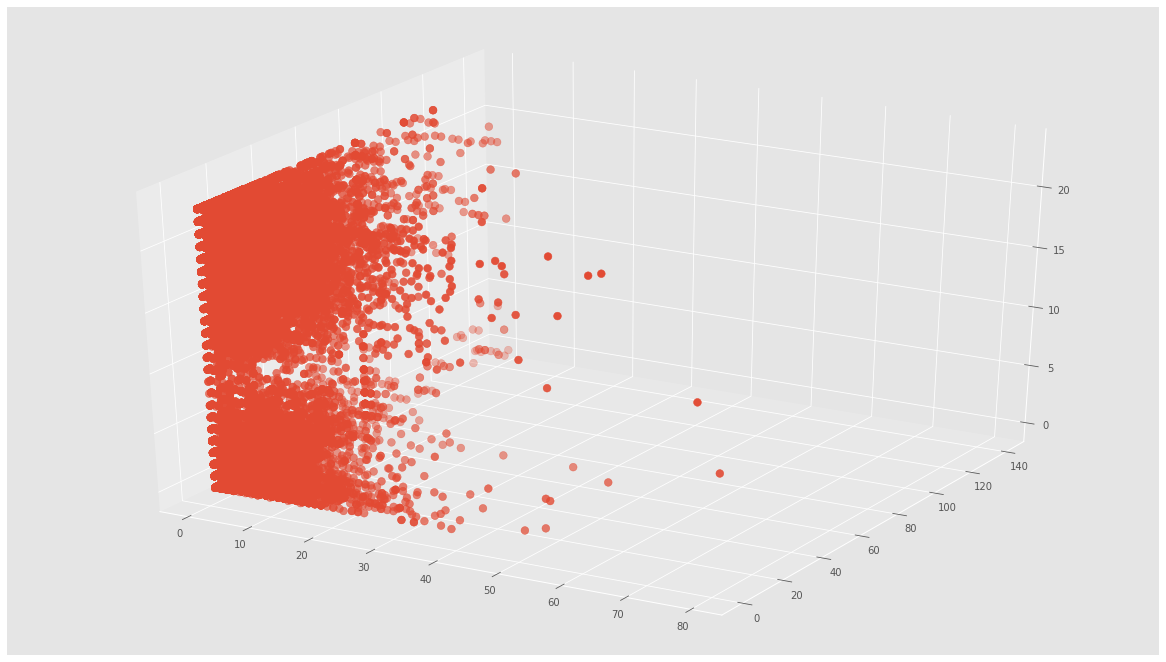

In [16]:
# librerias para graficar 2D y 3D
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

#  @markdown modelo de clusterizacion
X = np.array(df_cluster[['cta','store',	'hora',	'campaing_norm','duracion_minutos_norm']])
y = np.array(campa_analisis['user'])

fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
# for row in y:
#     # asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2],s=60)

In [15]:
# sns.heatmap(df_cluster.corr())

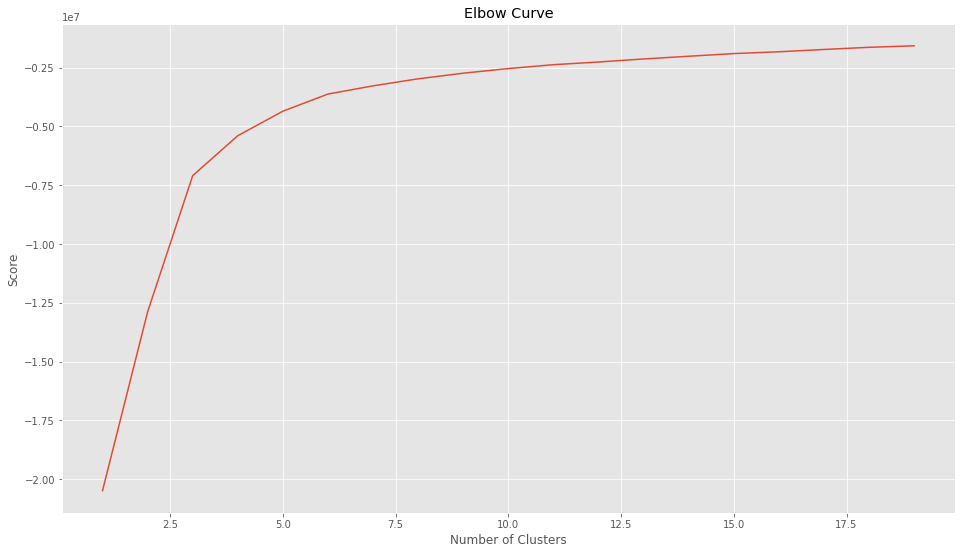

In [18]:
# @markdown encontrar el mejor numero de grupos para el modelo de grupos
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [19]:
#  @markdown  A corde a la grafica anterior y la intuicion de establecer grupos se decide colocar 8 grupos
kmeans = KMeans(n_clusters=8).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 2.45842462e+00  1.62866980e+01  1.65362546e+00  2.80479917e+00
   3.55093200e-02]
 [ 2.47696073e+00  4.41593056e+00  2.12455355e+01  2.98107147e+00
   3.76149311e-02]
 [ 2.49749338e+00  4.62462164e+00  1.57622966e+01  2.96779228e+00
   9.84933958e-03]
 [ 2.41014925e+00  3.72400000e+01  1.78865672e+00  2.56358209e+00
  -8.91422399e-02]
 [ 2.38432577e+00  4.90280392e+00  1.38627432e+00  2.97658443e+00
  -2.09171629e-02]
 [ 2.40237691e+00  7.93514431e+01  1.18404075e+01  2.65874363e+00
  -3.62335092e-02]
 [ 2.41098763e+00  1.69270986e+01  1.88259593e+01  2.90081778e+00
  -4.06971517e-02]
 [ 2.57642487e+00  4.12720207e+01  1.85306563e+01  2.78670121e+00
  -6.30481944e-02]]


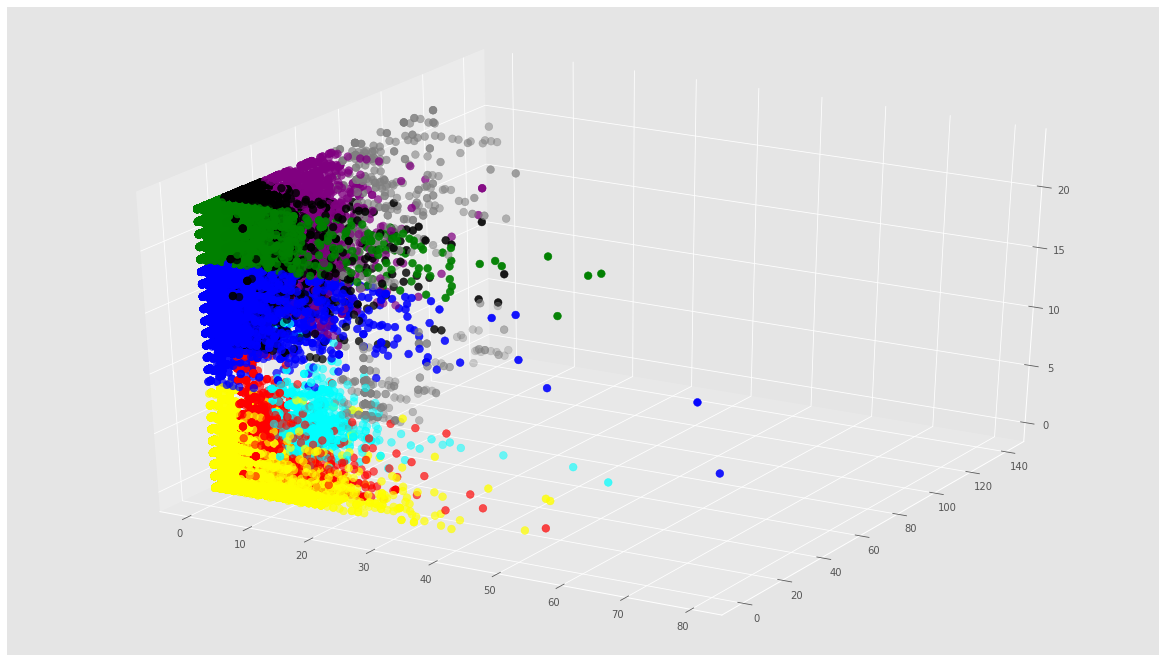

In [20]:
#  @markdown Uso del modelo clusterizado para predecir los grupos de acuerdo a las variables especificadas anteriormente
labels = kmeans.predict(X)

C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow','grey','black','purple']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [21]:
 # @markdown  tras analisis de los grupos con todas sus variables y una grafica con solo 3D de las 5 escogidas, pueden verse ciertos patrones
 # @markdown a continuacion se establecen los nombres de los grupos que serviran para analizar y especificar campañas de publicidad

grupos_categoria={0:"todo el dia, duracion mayor a 15 minutos",
                  1:"Mañana duracion menor a 10 minutos",
                  2:"Todo el dia compras esporadicas duracion menor a 8 minutos",
                  3:"Tarde noche poca interaccion",
                  4:"Todo el dia tiendas menores",
                  5:"Tarde duracion 5 - 10 minutos",
                  6:"Tarde con mucha publicidad",
                  7:"Mañana duracion menor a 10 minutos"}

df_cluster['grupo_cluster']=labels
df_cluster['grupo_cluster_cat']=df_cluster['grupo_cluster'].map(grupos_categoria)
df_cluster["user"]=save_fechas.user
df_cluster["session"]=save_fechas.session
df_cluster["fecha_inicio"]=save_fechas.fecha_inicio
df_cluster["fecha_fin"]=save_fechas.fecha_fin
df_cluster[:5]

,campaing,cta,store,hora,duracion_minutos_norm,campaing_norm,grupo_cluster,grupo_cluster_cat,user,session,fecha_inicio,fecha_fin
0,view_store_type,5.0,13,2,-0.022743,1,0,"todo el dia, duracion mayor a 15 minutos",9415,1.554602e+12,2019-04-15 02:59:30+00:00,2019-04-15 03:04:11
1,local_search,5.0,13,2,-0.022743,3,0,"todo el dia, duracion mayor a 15 minutos",9415,1.554602e+12,2019-04-15 02:59:30+00:00,2019-04-15 03:04:11
2,view_store_type,2.0,9,13,-0.368852,1,2,Todo el dia compras esporadicas duracion menor...,9415,1.554641e+12,2019-04-15 13:41:27+00:00,2019-04-15 13:41:49
3,view_store_type,1.0,13,20,-0.398251,1,6,Tarde con mucha publicidad,9415,1.554664e+12,2019-04-15 20:10:53+00:00,2019-04-15 20:10:53
4,view_store_type,1.0,13,18,-0.398251,1,6,Tarde con mucha publicidad,9415,1.554744e+12,2019-04-16 18:22:52+00:00,2019-04-16 18:22:52


In [ ]:
df_cluster['first']=0
df_cluster=df_cluster.sort_values(["session"])
for ses in df_cluster.session.unique():
  index=df_cluster[(df_cluster.session==ses)].index[0]
  df_cluster.loc[index,'first']=1
  
df_cluster["store"]=df_cluster.store*df_cluster["first"]
df_cluster.duracion_minutos_norm=save_fechas.duracion_minutos
df_cluster=df_cluster[['campaing', 'cta', 'store', 'hora', 'duracion_minutos_norm',
                       'grupo_cluster_cat', 'user','session', 'fecha_inicio', 'fecha_fin', 'first']]
df_cluster

# guardado de informacion

In [ ]:
df_cluster.to_csv(ruta_princ+"Clustered_Data.csv")

# analisis palabras mas buscadas
el ususario tendra registro por cada palabra buscada, si son 20 palabras tendra 20 registros esto con el objetivo de armar un modelo de clusterizacion mas adelante



estudio : el patron indica que un usuario tiende a escribir la misma palabra muchas veces comenzando por las primeras letras hasta alcanzar la busqueda deseada

In [ ]:
# @markdown escoger las columnas para analisis de palabras
df_2=df[["SESSION_ID","KEYWORD","obsf_user_id","OBSF_STORE_TYPE","fecha"]]
df_2["conteo"]=1
gr3=pd.DataFrame(df_2.groupby(["obsf_user_id","SESSION_ID","fecha","KEYWORD","OBSF_STORE_TYPE"])['conteo'].count()).reset_index()

words_analisis=pd.DataFrame({
    'user':[0],
    'session':[0],
    'word':['NAN'],
    "cta" : [0]   ,
    "store": [999]
})

for user in gr3.obsf_user_id.unique(): 
  temp1 = gr3[gr3.obsf_user_id==user]
  for session in temp1.SESSION_ID.unique():
    temp=gr3[(gr3.obsf_user_id==user) & (gr3.SESSION_ID==session)].reset_index(drop=True)
    words=pd.DataFrame(temp.KEYWORD.unique())
    # armar palabras mas buscadas por sesion y usuario
    lista=[]
    veces=[]
    prev="SMX"
    i=1
    for w in words[0]:
      if w.find(prev)!=-1:
        i=i+1
      else: 
        # revisar si esa palabra ya existe en la lista
        if (prev in lista)==False:
          lista=np.concatenate((lista,[prev]))
          veces=np.concatenate((veces,[i]))
          i=1
        else :
          index=lista.tolist().index(prev)
          # sumarle a la palabra que era igual
          veces[index]=veces[index]+i
          i=1

      prev=w
    if (prev in lista)==False:
          lista=np.concatenate((lista,[prev]))
          veces=np.concatenate((veces,[i]))
    else :
      index=lista.tolist().index(prev)
      # sumarle a la palabra que era igual
      veces[index]=veces[index]+i
    lista=lista[1:]
    veces=veces[1:]

    temp_word=pd.DataFrame({
                            'user':user,
                            'session':session,
                            'word':lista,
                            "cta" : veces,
                            "store":temp.OBSF_STORE_TYPE[0] 
                        })
    words_analisis=pd.concat([words_analisis,temp_word])

words_analisis.to_csv("word_analysis.csv",index=False)
words_analisis.word=words_analisis.word.apply(lambda x : str(x).replace(",",""))\
                                  .apply(lambda x : str(x).replace("  ",""))\
                                  .apply(lambda x : str(x).replace('"',""))\
                                  .apply(lambda x : str(x).replace('“',""))\
                                  .apply(lambda x : str(x).replace('”',""))\
                                  .apply(lambda x : str(x).replace('.',""))\
                                  .apply(lambda x : str(x).replace('/',""))\
                                  .apply(lambda x : str(x).replace("{",""))\
                                  .apply(lambda x : str(x).replace('  ',""))

words_analisis.word=words_analisis.word.apply(lambda x : str(x).replace(" ","" ) if(( x.find(" ")==0 )|( x[::-1].find(" ")==0 ))else x)
# words_analisis.to_csv(ruta_princ+"word_analysis.csv",index=False)
# words_analisis = pd.read_csv("word_analysis.csv")

# ANALSISI COMPLETO DE DATAFRAMES

In [22]:
# ANALSISI COMPLETO DE DATAFRAMES
df_cluster=pd.read_csv(ruta_princ+"Clustered_Data.csv").drop(columns=["Unnamed: 0"])
word_analisis=pd.read_csv(ruta_princ+"word_analysis.csv")#.drop(columns=["Unnamed: 0"])
df_cluster.fecha_inicio=pd.to_datetime(df_cluster.fecha_inicio)

df_cluster.shape,word_analisis.shape

((106046, 11), (75414, 5))

# -------------------------------------------------------------------------

# analisis de archivo ORDERS

In [32]:
orders   = pd.read_csv(ruta_princ+"challenge_orders.csv")
orders=orders.drop_duplicates()
orders.drop(columns="Unnamed: 0",inplace=True)
orders.TOTAL_VALUE=orders.TOTAL_VALUE.fillna(-1)
orders.head(1)

,ORDER_ID,PRODUCT_ID,PAYMENT_METHOD,TOTAL_VALUE,CREATED_AT,STORE_TO_USER_DISTANCE,OBSF_USER_ID,OBSF_STORE_TYPE
0,35394843,2090144731,cash,1940.0,2019-04-15 13:40:19+00:00,488.0,8540,5


In [33]:
# @markdown El historial de ventas muestra los productos variaron su valor, pero no se saben las razones.
# se procede a establecer un valor unico para cada producto, de acuerdo a los cuartiles, valor maximo, y promedio

precios=pd.DataFrame({
    'PRODUCT_ID':[0],
    'min_value':[0],
    'max_value':[0],
    'mean_value':[0],
    'total_revenue':[0],
    'cta':[0]
})

for prod in orders[["PRODUCT_ID"]].PRODUCT_ID.unique():
  temp=orders[orders.PRODUCT_ID==prod]

  temp_precios=pd.DataFrame({
    'PRODUCT_ID':[prod],
    'min_value':[temp.TOTAL_VALUE.quantile(0.25)],
    'max_value':[temp.TOTAL_VALUE.max()],
    'mean_value':[temp.TOTAL_VALUE.mean()],
    'total_revenue':[temp.TOTAL_VALUE.sum()],
    'cta':[temp.TOTAL_VALUE.count()]
      })
  precios=pd.concat([precios,temp_precios])

orders=orders.merge(precios,on="PRODUCT_ID",how="left")

In [34]:
# existen productos que definitivamente tienen valor =0 que generan ruido al analisis, y se decide quitarlos
orders=orders[orders.mean_value!=0]
orders.shape

(13677, 13)

In [35]:
# @markdown encontrar los outliers de los productos
q1=orders.TOTAL_VALUE.quantile(0.25)
q3=orders.TOTAL_VALUE.quantile(0.75)
upper=q3+1.5*(q3-q1)
q1,q3,upper

# guardado datos anomalos y outliers, para analisis exaustivo
precios[(precios.total_revenue==0)|(precios.mean_value>upper)].to_csv(ruta_princ+"productos_anomalos.csv",index=False)

orders['outlier']=False
orders['first']=0

orders.outlier=orders.outlier.apply(lambda x : True if x >= upper else False)

orders=orders.sort_values(["PRODUCT_ID"])
for prod in orders.PRODUCT_ID.unique():
  index=orders[(orders.PRODUCT_ID==prod)].index[0]
  orders.loc[index,'first']=1
orders[:2]

,ORDER_ID,PRODUCT_ID,PAYMENT_METHOD,TOTAL_VALUE,CREATED_AT,STORE_TO_USER_DISTANCE,OBSF_USER_ID,OBSF_STORE_TYPE,min_value,max_value,mean_value,total_revenue,cta,outlier,first
10486,35415971,2616,cc,6429.03,2019-04-16 19:15:47+00:00,678.0,5933,4,1990.0,28762.0,6083.464203,419759.03,69,False,1
10522,35402422,2616,cash,5990.00,2019-04-15 20:11:52+00:00,1615.0,126,4,1990.0,28762.0,6083.464203,419759.03,69,False,0


# analisis rango horarios

(13677, 16) ['ORDER_ID' 'PRODUCT_ID' 'PAYMENT_METHOD' 'TOTAL_VALUE' 'CREATED_AT'
 'STORE_TO_USER_DISTANCE' 'OBSF_USER_ID' 'OBSF_STORE_TYPE' 'min_value'
 'max_value' 'mean_value' 'total_revenue' 'cta' 'outlier' 'first' 'hora']


,ORDER_ID,PRODUCT_ID,PAYMENT_METHOD,TOTAL_VALUE,CREATED_AT,STORE_TO_USER_DISTANCE,OBSF_USER_ID,OBSF_STORE_TYPE,min_value,max_value,mean_value,total_revenue,cta,outlier,first,hora
10486,35415971,2616,cc,6429.03,2019-04-16 19:15:47,678.0,5933,4,1990.0,28762.0,6083.464203,419759.03,69,False,1,19
10522,35402422,2616,cash,5990.00,2019-04-15 20:11:52,1615.0,126,4,0.0,0.0,0.000000,0.00,69,False,0,20
10523,35402538,2616,cash,0.00,2019-04-15 20:15:43,4555.0,2245,4,0.0,0.0,0.000000,0.00,69,False,0,20


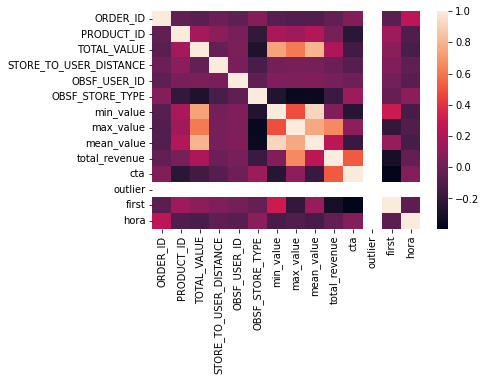

In [36]:
# para analisis en el rango de horas del dia se procede a extraer la hora de la fecha de cracion de registro

sorted(orders.CREATED_AT.unique(), reverse=True)
orders["hora"]=pd.to_datetime(orders.CREATED_AT.str.split("+",expand=True)[0]).dt.hour
orders["CREATED_AT"]=pd.to_datetime(orders.CREATED_AT.str.split("+",expand=True)[0])

sns.heatmap(orders.corr())
print(orders.shape,orders.columns.values)
orders["min_value"]=orders.min_value*orders["first"]
orders["max_value"]=orders.max_value*orders["first"]
orders["mean_value"]=orders.mean_value*orders["first"]
orders["total_revenue"]=orders.total_revenue*orders["first"]
orders[:3]

# Modelo clusterizacion para productos

(13608, 5)


,PRODUCT_ID,STORE_TO_USER_DISTANCE,hora,TOTAL_VALUE,mean_value
0,2616,390.0,20,4990.0,6083.464203
1,2616,544.0,19,9830.0,6083.464203
2,2616,639.0,20,290.0,6083.464203
3,2616,669.0,20,3790.0,6083.464203


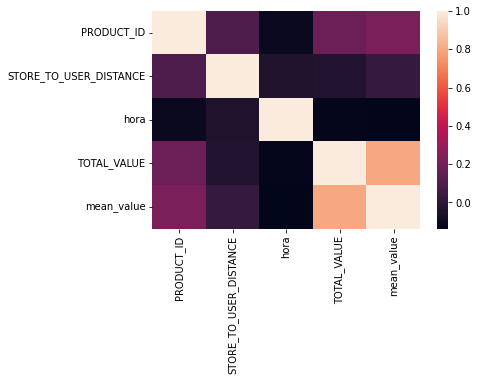

In [37]:
grupos_precios=pd.DataFrame(orders.groupby(['PRODUCT_ID',"STORE_TO_USER_DISTANCE", 'hora'])["TOTAL_VALUE"].median()).reset_index()
grupos_precios=grupos_precios.merge(precios[["PRODUCT_ID","mean_value"]],on="PRODUCT_ID",how="left")
sns.heatmap(grupos_precios.corr())
print(grupos_precios.shape)
grupos_precios[:4]

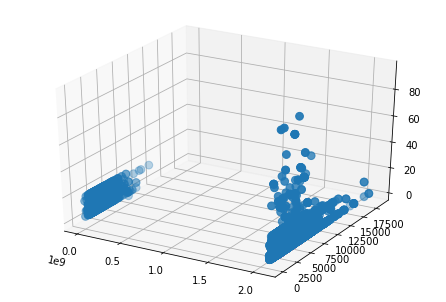

In [38]:
grupos_precios=pd.DataFrame(orders.groupby(['PRODUCT_ID',"OBSF_STORE_TYPE","STORE_TO_USER_DISTANCE", 'hora'])["TOTAL_VALUE"].median()).reset_index()
grupos_precios=grupos_precios.merge(precios[["PRODUCT_ID","mean_value"]],on="PRODUCT_ID",how="left")

%matplotlib inline

# modelo de clusterizacion
X = np.array(grupos_precios[['PRODUCT_ID',	'STORE_TO_USER_DISTANCE',	'OBSF_STORE_TYPE','hora',	'TOTAL_VALUE',	'mean_value']])
y = np.array(grupos_precios['STORE_TO_USER_DISTANCE'])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2],s=60)

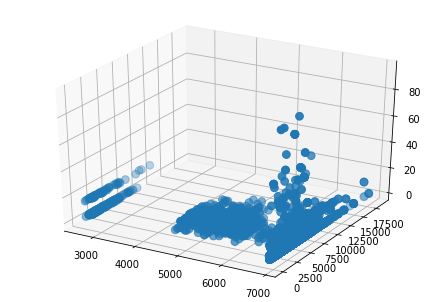

In [39]:

#**********************************************

grupos_precios["PRODUCT_ID_norm"]=grupos_precios.PRODUCT_ID.apply(lambda x : round(((x/100000)-14000),1) if x>8000 else x)

X = np.array(grupos_precios[['PRODUCT_ID_norm',	'STORE_TO_USER_DISTANCE','OBSF_STORE_TYPE',	'hora',	'TOTAL_VALUE',	'mean_value']])
y = np.array(grupos_precios['STORE_TO_USER_DISTANCE'])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2],s=60)

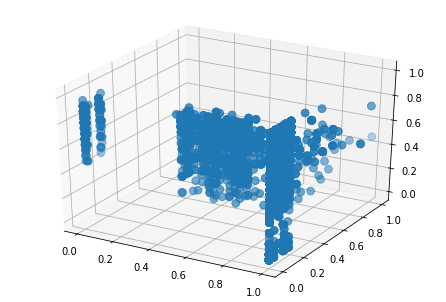

In [40]:
# @markdown uso de herramientas de escalamiento y normalizacio de datos, y asi agregarlos al modelo
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
grupos_precios_2=grupos_precios.copy()
grupos_precios.iloc[:,:] = scaler.fit_transform(grupos_precios)
grupos_final=pd.concat([grupos_precios,grupos_precios_2],axis=1)

X = np.array(grupos_precios[['PRODUCT_ID_norm','OBSF_STORE_TYPE',	'hora',	'STORE_TO_USER_DISTANCE','TOTAL_VALUE',	'mean_value']])
y = np.array(grupos_precios['STORE_TO_USER_DISTANCE'])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2],s=60)


In [41]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

[[0.98165663 0.06177055 0.79169937 0.18701587 0.08883656 0.09906644]
 [0.16575218 0.07114975 0.7693425  0.1517969  0.03865569 0.03900837]
 [0.99398454 0.03370629 0.46837734 0.1952424  0.21131582 0.19268031]]


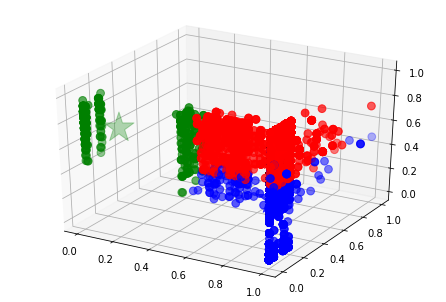

In [42]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [43]:
# @markdown nombre de grupos de acuerdo a analisis de varibales y grafico 3D
grupos_categoria={0:"Tarde y Nocturnos productos costosos",
                  1:"Medio dia y tarde, productos baratos",
                  2:"Mañana productos costosos",}

grupos_final['grupo_cluster']=labels
grupos_final['grupo_cluster_cat']=grupos_final['grupo_cluster'].map(grupos_categoria)
grupos_final#.columns.values

cols=['producto_norm',"store_norm","distancia_norm",'hora_norm', 'total_norm','mean_value_norm','producto_norm',"prod","store",'distancia','hora','total','mean_value','producto_norm','grupo_cluster', 'grupo_cluster_cat']
grupos_final.columns=cols
grupos_final=grupos_final[['prod',"store",'distancia','hora','total','mean_value','grupo_cluster', 'grupo_cluster_cat']]
grupos_final[:2]

,prod,store,distancia,hora,total,mean_value,grupo_cluster,grupo_cluster_cat
0,2616,4,544.0,19,9830.0,6083.464203,1,"Medio dia y tarde, productos baratos"
1,2616,4,639.0,20,290.0,6083.464203,1,"Medio dia y tarde, productos baratos"


In [44]:
grupos_final=grupos_final.merge(orders[['PRODUCT_ID','CREATED_AT', 'STORE_TO_USER_DISTANCE', 'hora']],
                   left_on=["prod","distancia","hora"],right_on=['PRODUCT_ID', 'STORE_TO_USER_DISTANCE', 'hora'],how="left")

grupos_final=grupos_final[['prod',"store",	'distancia',	'hora',	'total',	'mean_value',	'grupo_cluster',	'grupo_cluster_cat',	'CREATED_AT'	]]

# guardar datos

In [31]:
grupos_final.to_csv(ruta_princ+"final_precios_escalados.csv")

# Revision de dataframes finales

In [45]:
word_analysis=pd.read_csv(ruta_princ+"word_analysis.csv")[1:]
clustered_campana=pd.read_csv(ruta_princ+"Clustered_Data.csv").drop(columns="Unnamed: 0")
productos_anomalos=pd.read_csv(ruta_princ+"productos_anomalos.csv")[1:]
precios=pd.read_csv(ruta_princ+"final_precios_escalados.csv").drop(columns="Unnamed: 0")

analy= pd.read_csv(ruta_princ+"challenge_analytics.csv")
orders   = pd.read_csv(ruta_princ+"challenge_orders.csv")


word_analysis.shape,clustered_campana.shape,precios.shape,productos_anomalos.shape,orders.shape,analy.shape

((75413, 5), (106046, 11), (13821, 12), (737, 6), (14210, 9), (489258, 11))

In [ ]:
from google.cloud import bigquery
client = bigquery.Client()

# TODO(developer): Set table_id to the ID of the table to create.
table_id = "project.dataset.registro_campañas"

schema = [
    bigquery.SchemaField("columns", "STRING", mode="REQUIRED"),
]
table = bigquery.Table(table_id, schema=schema)
table = client.create_table(table)